In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# import graphviz

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [6]:
X = df.drop("target", axis = 1)
y = df["target"]

In [7]:
X.shape

(100, 3)

In [8]:
y.shape

(100,)

In [9]:
X.head()

,education,gender,EQ
0,1,1,148
1,1,1,131
2,1,1,126
3,1,1,135
4,1,1,132


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

____

In [11]:
seed = 42
models = []
models.append(('XGBoost', XGBClassifier(seed = seed) ))
models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_jobs=-1 )))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=4, random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))

results, names  = [], []
num_folds = 5
scoring = 'accuracy'
xyz=[]
classifiers=['XGBoost','SVC','RF','KNN','Decision Tree','KNN']

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring, n_jobs= -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(name)
    print(cv_results)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Test Accuracy")
    print(accuracy_score(y_test, predictions))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report")
    print(classification_report(y_test, predictions))

    print("_"*60)

XGBoost: 0.960000 (0.053333)
XGBoost
[1.         0.86666667 1.         1.         0.93333333]
Test Accuracy
1.0
Confusion Matrix
[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         6
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         9
          4       1.00      1.00      1.00         7
          5       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        25

____________________________________________________________


C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


SVC: 0.920000 (0.049889)
SVC
[0.86666667 0.86666667 0.93333333 0.93333333 1.        ]
Test Accuracy
0.96
Confusion Matrix
[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 8 1 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         6
          2       1.00      1.00      1.00         1
          3       1.00      0.89      0.94         9
          4       0.88      1.00      0.93         7
          5       1.00      1.00      1.00         2

avg / total       0.96      0.96      0.96        25

____________________________________________________________
RF: 0.880000 (0.077746)
RF
[0.73333333 0.86666667 0.93333333 0.93333333 0.93333333]
Test Accuracy
0.76
Confusion Matrix
[[3 3 0 0 0]
 [0 1 0 0 0]
 [0 1 7 1 0]
 [0 0 0 7 0]
 [0 0 0 1 1]]
Classification Report
             precision    recall  f1-score   support

          1       1.00      0.50      0.67         6
          2       0.20      1.00      0.

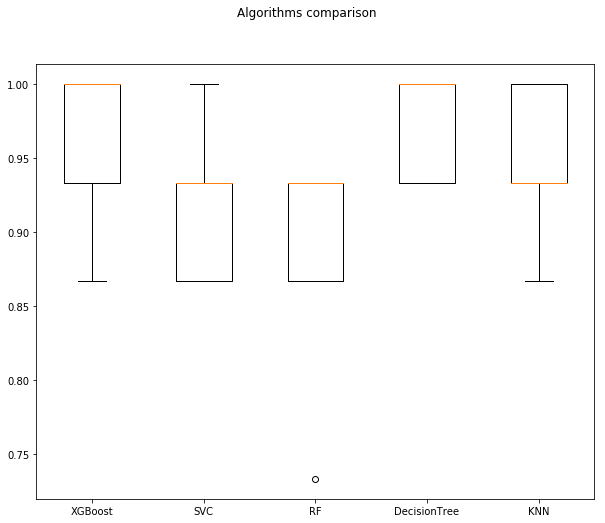

In [13]:
fig = plt.figure(figsize=(10,6))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()